Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [45]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip -q /content/gdrive/MyDrive/CNN_Assignment/CNN_assignment.zip

In [48]:
!ls

 gdrive       'Skin cancer ISIC The International Skin Imaging Collaboration'
 sample_data


In [49]:
!ls "Skin cancer ISIC The International Skin Imaging Collaboration"

Test  Train


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [50]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [51]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('Train images:\t',image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('Test images:\t',image_count_test)

Train images:	 2239
Test images:	 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [52]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [53]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, validation_split = 0.2, subset = 'training', image_size=(img_height, img_width), batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, validation_split= 0.2, subset= 'validation', image_size=(img_height, img_width), batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [55]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

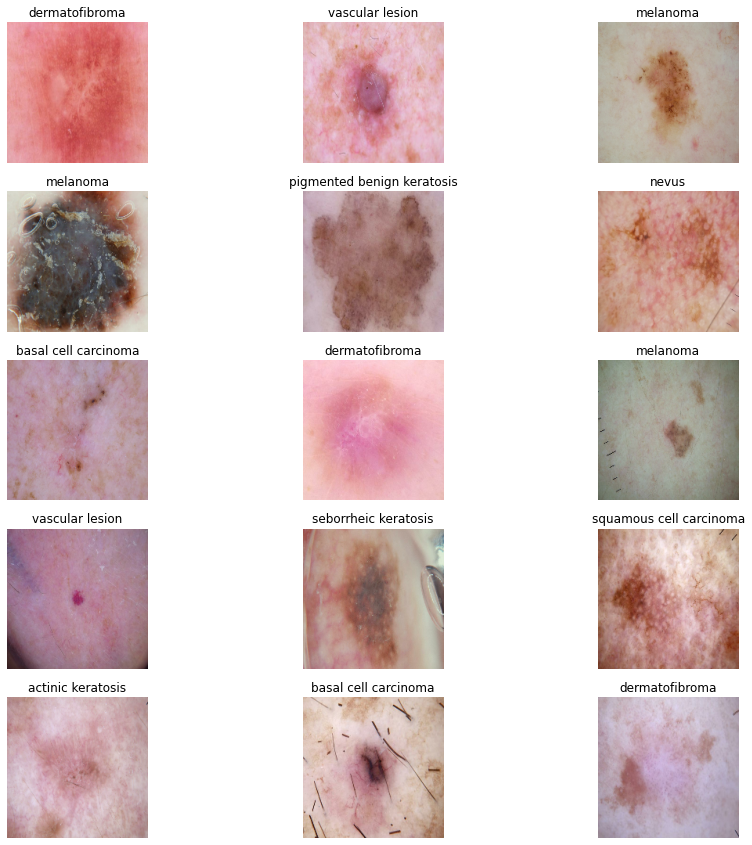

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [57]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [58]:
number_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 129600)           

### Train the model

In [61]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 35s 81ms/step - loss: 1.8277 - accuracy: 0.3144 - val_loss: 1.3871 - val_accuracy: 0.4781
Epoch 2/20
169/169 [==============================] - 8s 50ms/step - loss: 1.3511 - accuracy: 0.4985 - val_loss: 1.3532 - val_accuracy: 0.4989
Epoch 3/20
169/169 [==============================] - 9s 50ms/step - loss: 1.0878 - accuracy: 0.6009 - val_loss: 1.0086 - val_accuracy: 0.6355
Epoch 4/20
169/169 [==============================] - 8s 50ms/step - loss: 0.8592 - accuracy: 0.6964 - val_loss: 0.9209 - val_accuracy: 0.6815
Epoch 5/20
169/169 [==============================] - 8s 50ms/step - loss: 0.6371 - accuracy: 0.7761 - val_loss: 0.9488 - val_accuracy: 0.6823
Epoch 6/20
169/169 [==============================] - 9s 51ms/step - loss: 0.5108 - accuracy: 0.8299 - val_loss: 0.9841 - val_accuracy: 0.7186
Epoch 7/20
169/169 [==============================] - 8s 50ms/step - loss: 0.3742 - accuracy: 0.8711 - val_loss: 0.8542 - val_accuracy: 0.772

### Visualizing training results

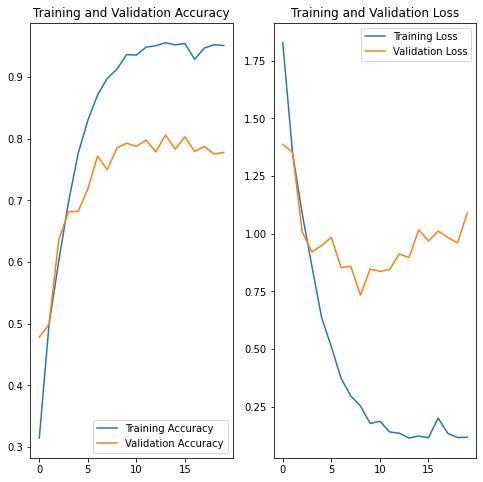

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### In the above plot, we can observe that training accuracy is increasing linearly with the time whereas the validation accuracy stalls around 52% in the training process. Also the difference in accuracy between training and validation accuracy is noticable - a sign of overfitting.  

In [63]:
#After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augumentation = keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip('horizontal',
                                                  input_shape=(img_height,img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
     ]
)  


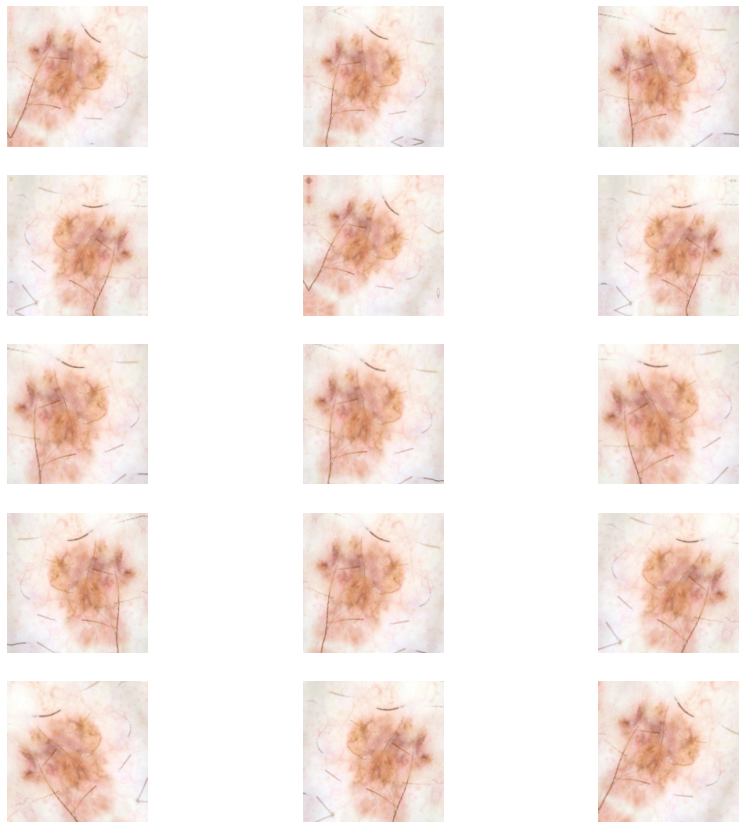

In [64]:
#visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(15,15))
for images, _ in train_ds.take(1):
  for i in range(15):
    augumented_images = data_augumentation(images)
    ax = plt.subplot(5, 3, i+1)
    plt.imshow(augumented_images[0].numpy().astype('uint8'))
    plt.axis('off')

### Todo:
### Create the model, compile and train the model


In [65]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([
    data_augumentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(number_classes)
])



### Compiling the model

In [66]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [67]:
##train your model for 20 epochs
epochs = 20
history = model.fit(
    train_ds, validation_data=val_ds, epochs = epochs
)

Epoch 1/20
169/169 [==============================] - 12s 64ms/step - loss: 2.4443 - accuracy: 0.2379 - val_loss: 1.5861 - val_accuracy: 0.3927
Epoch 2/20
169/169 [==============================] - 10s 62ms/step - loss: 1.4992 - accuracy: 0.4277 - val_loss: 1.4096 - val_accuracy: 0.4744
Epoch 3/20
169/169 [==============================] - 11s 62ms/step - loss: 1.3680 - accuracy: 0.4777 - val_loss: 1.3055 - val_accuracy: 0.5122
Epoch 4/20
169/169 [==============================] - 10s 62ms/step - loss: 1.2950 - accuracy: 0.5102 - val_loss: 1.2384 - val_accuracy: 0.5449
Epoch 5/20
169/169 [==============================] - 11s 62ms/step - loss: 1.2572 - accuracy: 0.5217 - val_loss: 1.2224 - val_accuracy: 0.5457
Epoch 6/20
169/169 [==============================] - 11s 62ms/step - loss: 1.2084 - accuracy: 0.5386 - val_loss: 1.1828 - val_accuracy: 0.5494
Epoch 7/20
169/169 [==============================] - 11s 62ms/step - loss: 1.1245 - accuracy: 0.5746 - val_loss: 1.1793 - val_accuracy:

### Visualizing the results

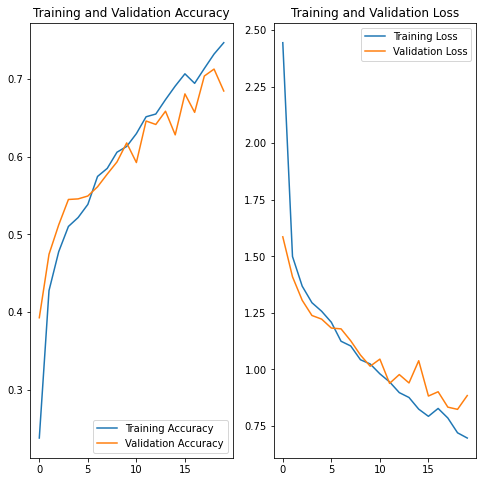

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### In the above plot, we can observe that training accuracy is increasing linearly with the time whereas the validation accuracy stalls around 51% in the training process. Also the difference in accuracy between training and validation accuracy is noticable - a sign of overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [69]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [70]:
dataframe_dict_original =  dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
1,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
2,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
3,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2235,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2236,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2237,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis


Class=2, n=95 (4.243%)
Class=1, n=376 (16.793%)
Class=3, n=438 (19.562%)
Class=7, n=181 (8.084%)
Class=0, n=114 (5.092%)
Class=8, n=139 (6.208%)
Class=6, n=77 (3.439%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)


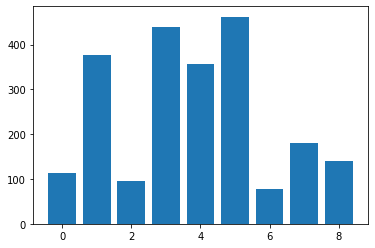

In [71]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
X, y = original_df['Path'], original_df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

#### - The class 6 has the least number of samples with accuracy 3.4 %.

#### - Class 5, Class 3, Class 1 have dominated the data in terms proportionate number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [72]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [73]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE1DB7EBB10>: 100%|██████████| 500/500 [00:20<00:00, 24.13 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE15FE1F2D0>: 100%|██████████| 500/500 [00:20<00:00, 24.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE15FB51D10>: 100%|██████████| 500/500 [00:20<00:00, 24.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=965x724 at 0x7FE0EBA170D0>: 100%|██████████| 500/500 [01:45<00:00,  4.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=960x645 at 0x7FE1D00564D0>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE16162BBD0>: 100%|██████████| 500/500 [00:19<00:00, 25.13 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE163E82290>: 100%|██████████| 500/500 [00:49<00:00, 10.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE15FF58890>: 100%|██████████| 500/500 [00:20<00:00, 24.91 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0E3BE1950>: 100%|██████████| 500/500 [00:20<00:00, 24.02 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [74]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [75]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027648.jpg_8554f568-349a-400d-80f9-b84e13a204f7.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0031799.jpg_a2eb6537-4584-4d83-a6a0-f00dfbcd7de0.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027745.jpg_b60153bc-6b81-4dcb-8c01-a2b98906c220.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030442.jpg_444b41b9-a60b-4f05-9c32-bc74c75e99c8.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033780.jpg_bc5007ce-3601-4ea7-b7c9-cad77aaa26e1.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC

In [76]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [77]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [78]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [79]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [80]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [81]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [82]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [83]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(number_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [84]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [85]:
epochs = 50
history = model.fit(
    train_ds, validation_data = val_ds, epochs = epochs
)

Epoch 1/50
281/281 [==============================] - 55s 82ms/step - loss: 1.9572 - accuracy: 0.3224 - val_loss: 1.5264 - val_accuracy: 0.4059
Epoch 2/50
281/281 [==============================] - 15s 55ms/step - loss: 1.2839 - accuracy: 0.5254 - val_loss: 1.1676 - val_accuracy: 0.5799
Epoch 3/50
281/281 [==============================] - 15s 55ms/step - loss: 1.0103 - accuracy: 0.6464 - val_loss: 0.9219 - val_accuracy: 0.6996
Epoch 4/50
281/281 [==============================] - 15s 54ms/step - loss: 0.7761 - accuracy: 0.7256 - val_loss: 0.9686 - val_accuracy: 0.6604
Epoch 5/50
281/281 [==============================] - 15s 55ms/step - loss: 0.6073 - accuracy: 0.7933 - val_loss: 0.6337 - val_accuracy: 0.8042
Epoch 6/50
281/281 [==============================] - 15s 55ms/step - loss: 0.4755 - accuracy: 0.8426 - val_loss: 0.6362 - val_accuracy: 0.7939
Epoch 7/50
281/281 [==============================] - 15s 55ms/step - loss: 0.3828 - accuracy: 0.8714 - val_loss: 0.5235 - val_accuracy:

#### **Todo:**  Visualize the model results

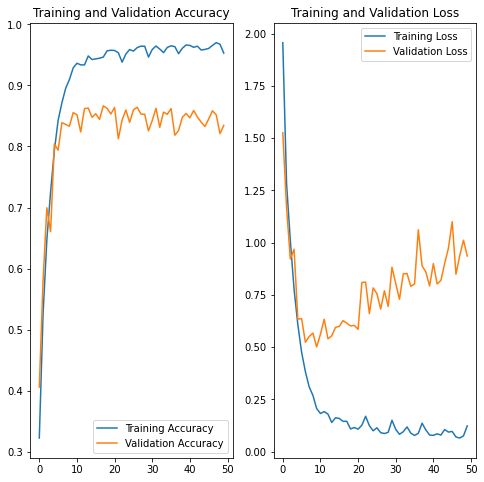

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### In the above plot, we can observe that the training accuracy is increasing linearly with the time whereas the validation accuracy comes around 78.4 % in the training process.Also, difference in accuracy between training and validation is not noticable which means the model is behaving pretty well and made us to get rid off overfitting or underfitting model. Yes, the class rebalance helped in order to operate on training set where the problem of oversampling or undersampling do not come under the scenario which keeps the training data set unchanged and adjust the training.

